# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Running this project require the following imports 

In [40]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.datasets import load_iris
import scipy.spatial.distance 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



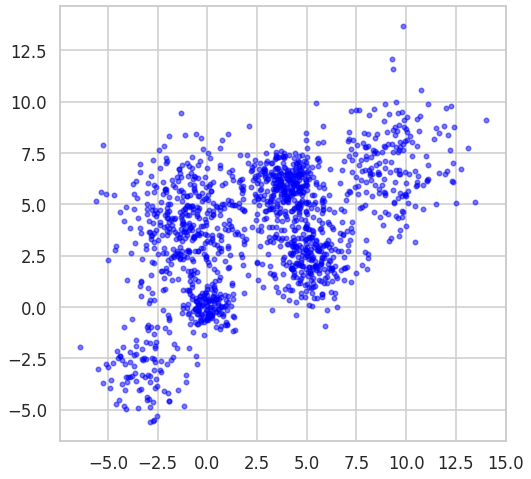

In [5]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* ***Use Kmeans with different values of K to cluster the above data ***
* ***Display the outcome of each value of K ***
* ***Plot distortion function versus K and choose the approriate value of k ***
* **Plot the silhouette_score versus K and use it to choose the best K** 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

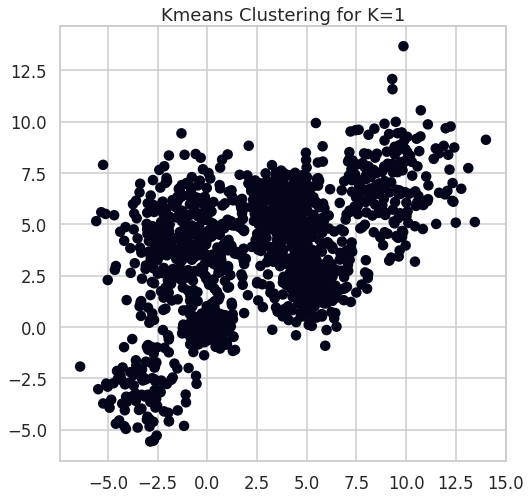

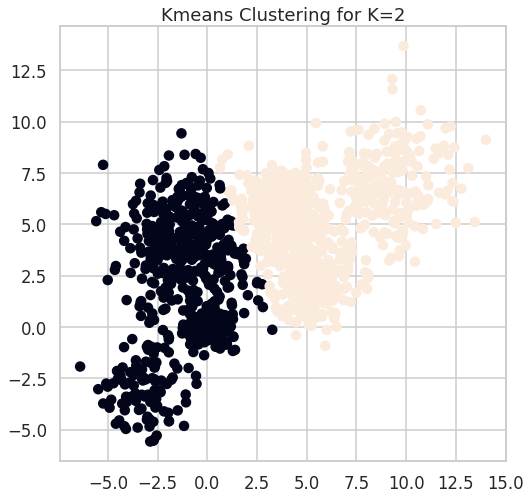

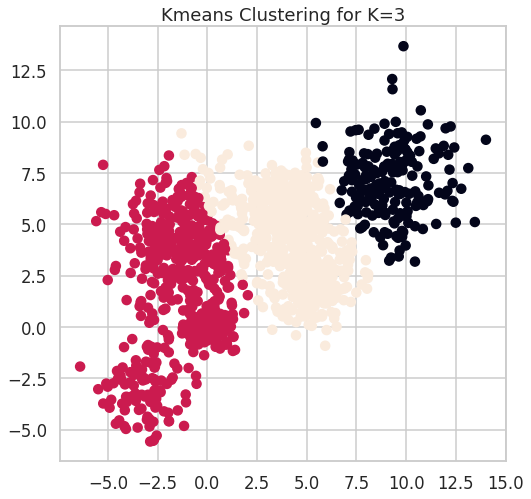

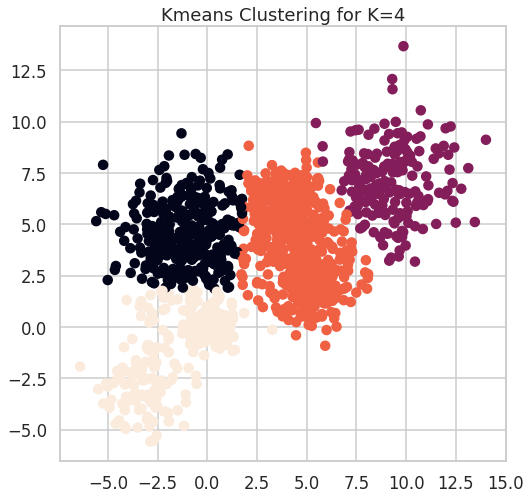

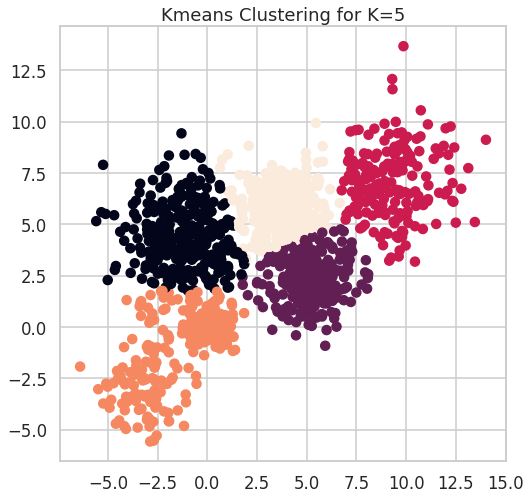

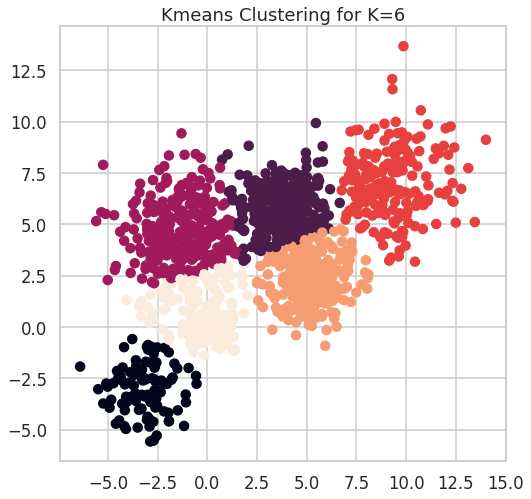

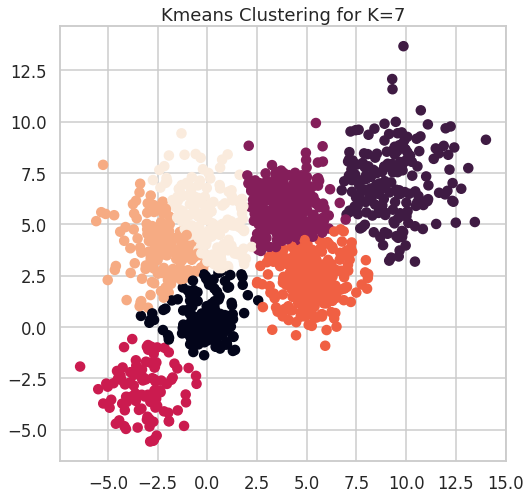

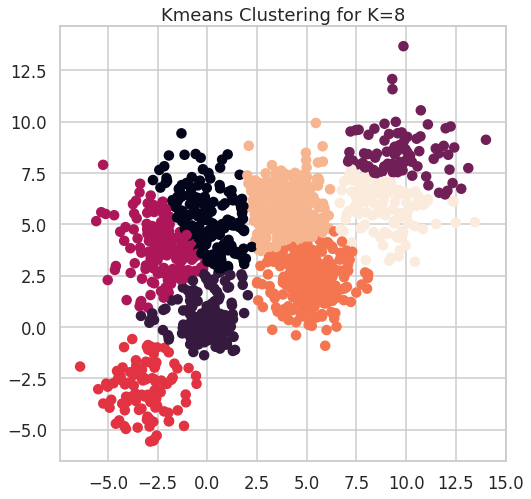

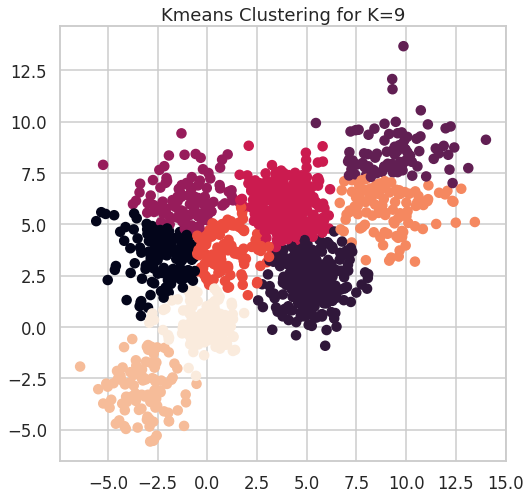

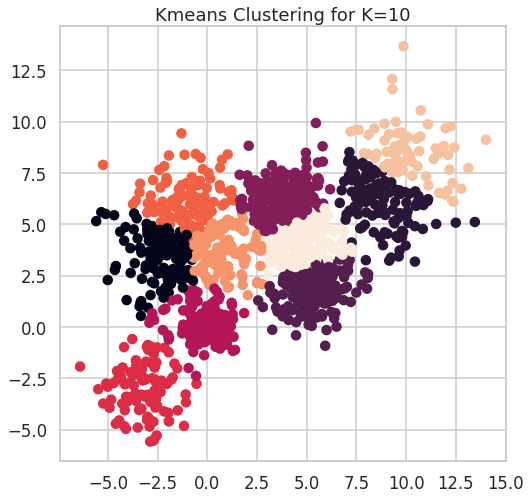

In [28]:

cs = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
    kmeans.fit(Multi_blob_Data)
    cs.append(kmeans.inertia_)
    plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=kmeans.labels_)
    plt.title("Kmeans Clustering for K="+str(k))
    plt.show()

Elbow Method

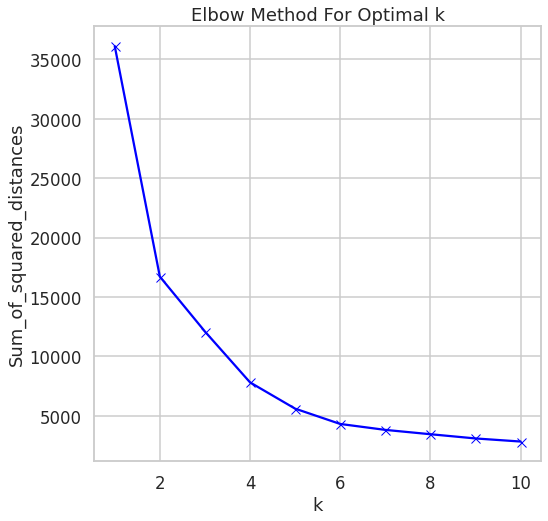

4

In [29]:
inertia = []
K = range(1,11)
distortions=[]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Multi_blob_Data)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(scipy.spatial.distance.cdist(Multi_blob_Data,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    Multi_blob_Data.shape[0])
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

Silhouette Score

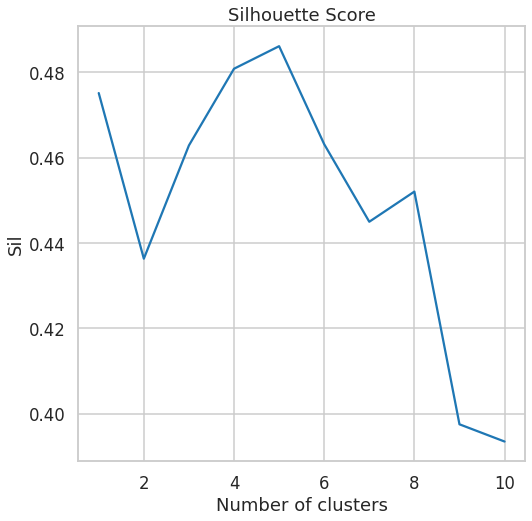

In [30]:
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(Multi_blob_Data)
  labels = kmeans.labels_
  sil.append(silhouette_score(Multi_blob_Data, labels, metric = 'euclidean'))
plt.plot(range(1, 11), sil)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

Euclidean & Single

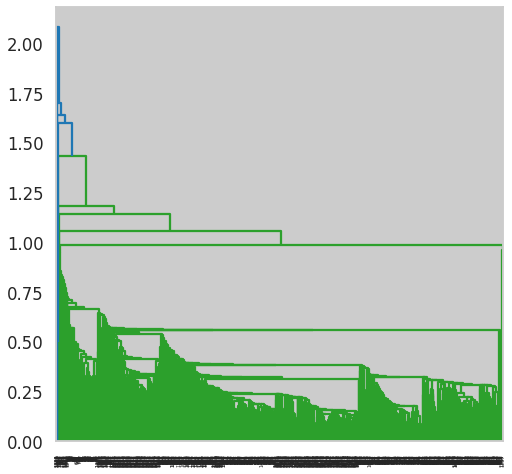

In [34]:

clusters = shc.linkage(Multi_blob_Data, method='single', 
            metric="euclidean")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

Euclidean & Average

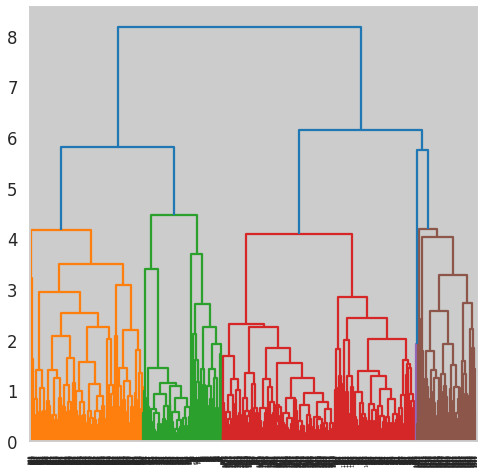

In [35]:

clusters = shc.linkage(Multi_blob_Data, method='average', 
            metric="euclidean")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

 Cosine & Average

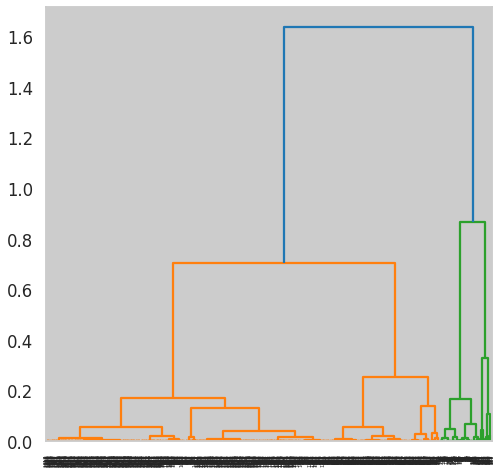

In [36]:
clusters = shc.linkage(Multi_blob_Data,"average", metric="cosine")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

Cosine & Single

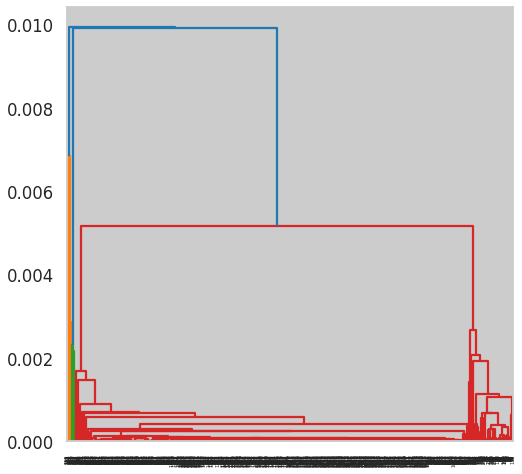

In [37]:
clusters = shc.linkage(Multi_blob_Data,"single", metric="cosine")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

Manhattan & single

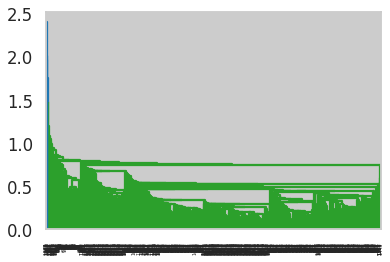

In [43]:
clusters = shc.linkage(Multi_blob_Data,"single", metric="cityblock")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

Manhattan & Average

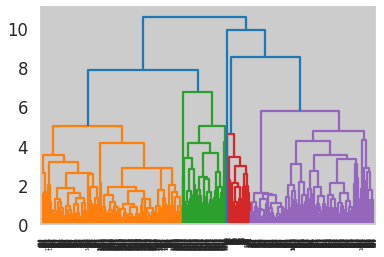

In [61]:
clusters = shc.linkage(Multi_blob_Data,"average", metric="cityblock")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

Distance Threshold

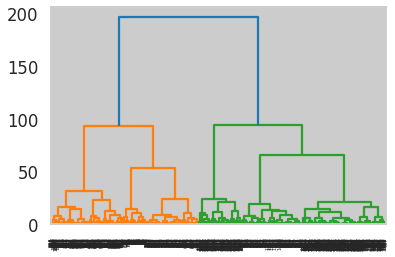

In [45]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
trained_model = clustering_model.fit(Multi_blob_Data)


# A method for generating dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# plot dendrogram to visualize clusters
plot_dendrogram(trained_model)

[19.4648693   5.46304721]


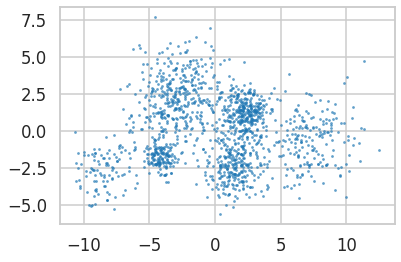

In [57]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(Multi_blob_Data)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(Multi_blob_Data)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

For n_clusters = 2 The average silhouette_score is : 0.4702126931832277
For n_clusters = 3 The average silhouette_score is : 0.4315064521954122
For n_clusters = 4 The average silhouette_score is : 0.44449080725537915
For n_clusters = 5 The average silhouette_score is : 0.4612538876750675
For n_clusters = 6 The average silhouette_score is : 0.4686938472105883
For n_clusters = 7 The average silhouette_score is : 0.4450051442321697
For n_clusters = 8 The average silhouette_score is : 0.4184600791766661
For n_clusters = 9 The average silhouette_score is : 0.4070967605230959
For n_clusters = 10 The average silhouette_score is : 0.41380110739757836


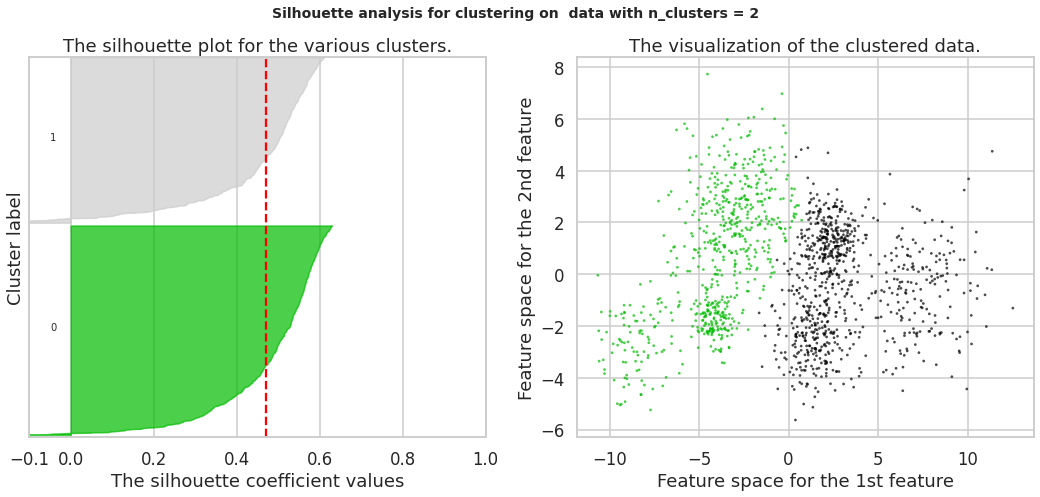

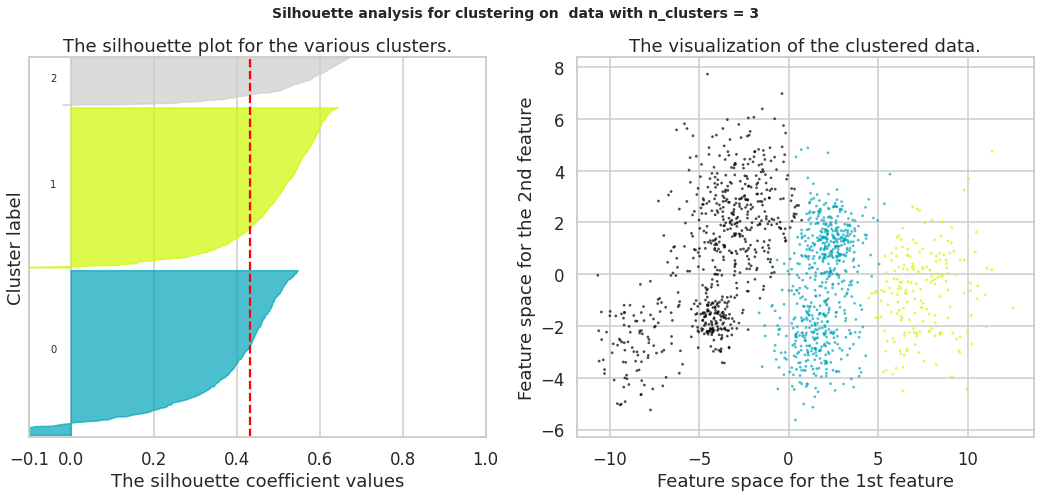

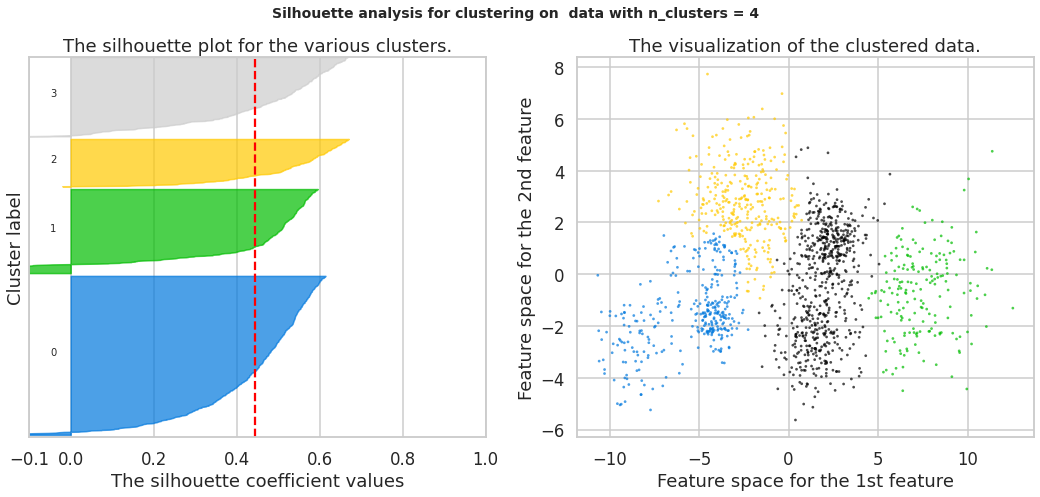

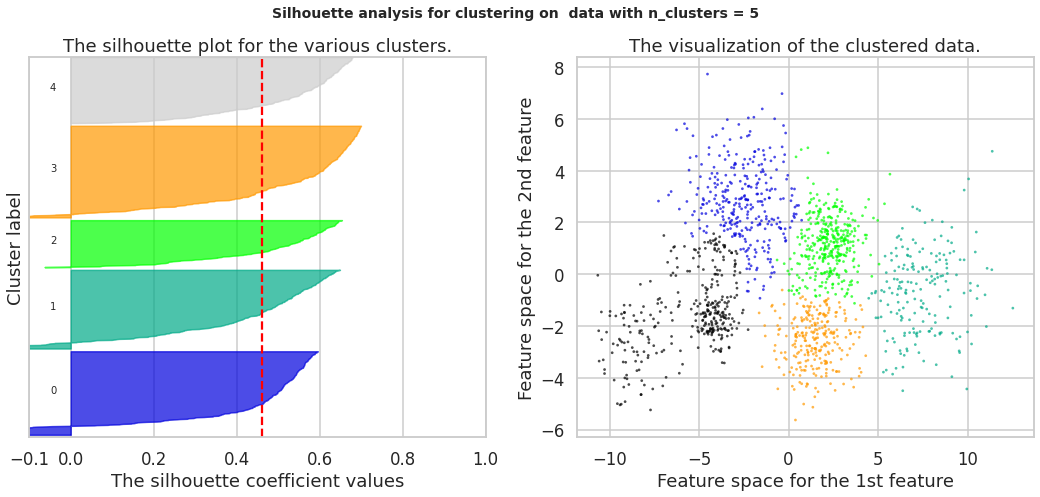

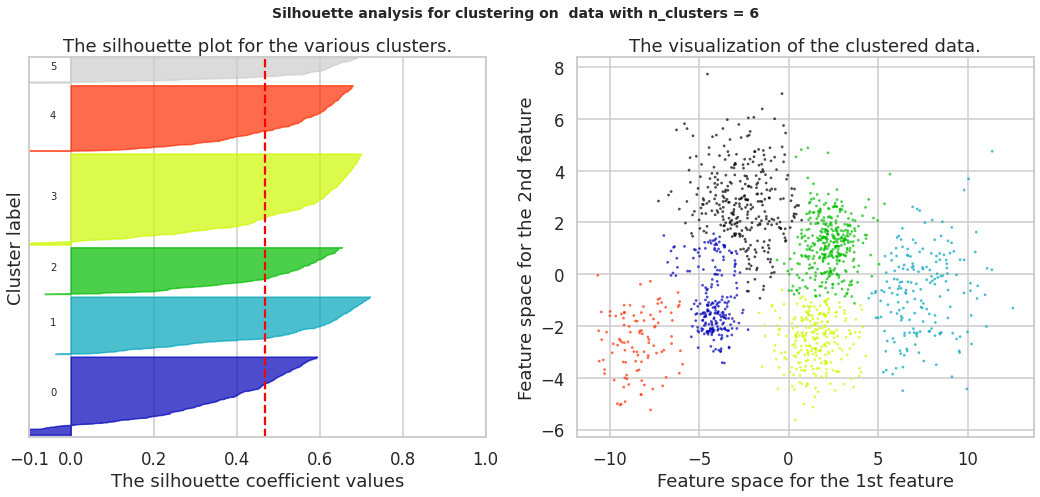

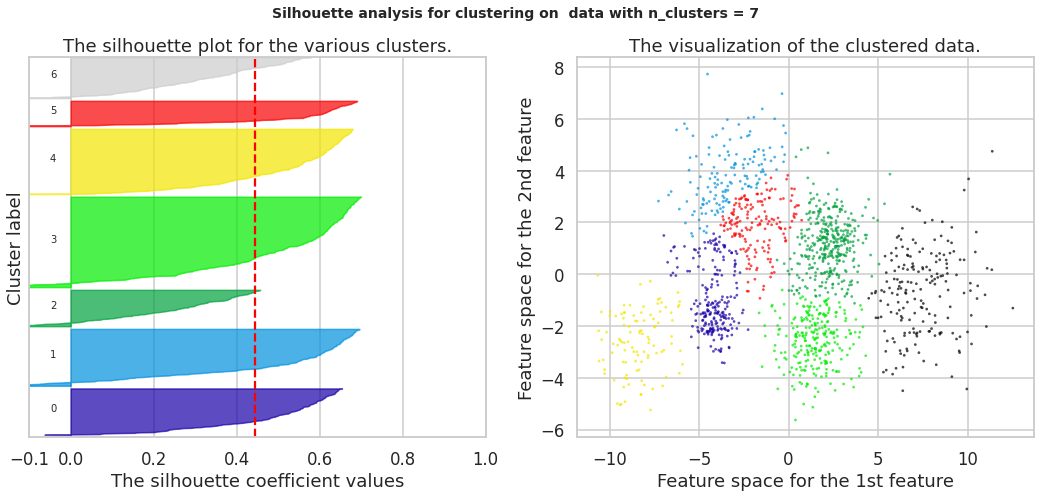

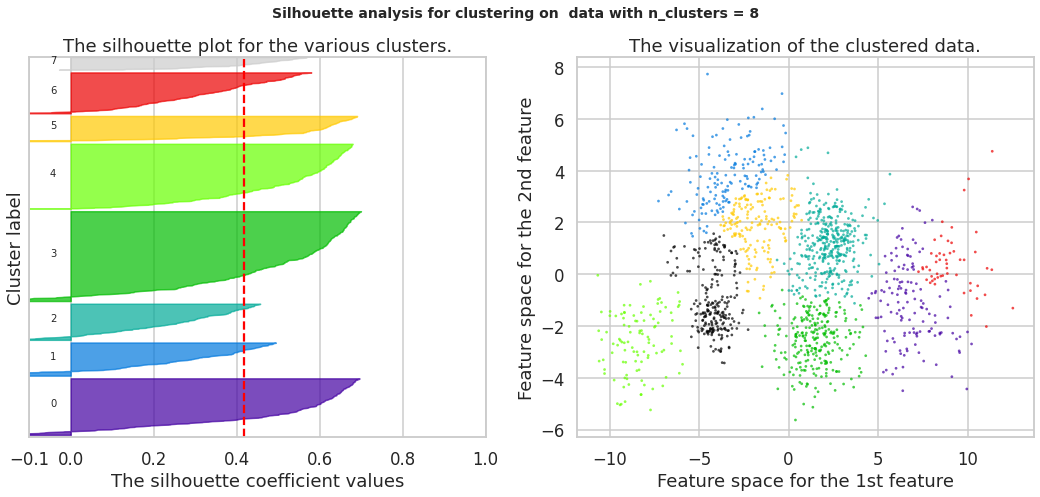

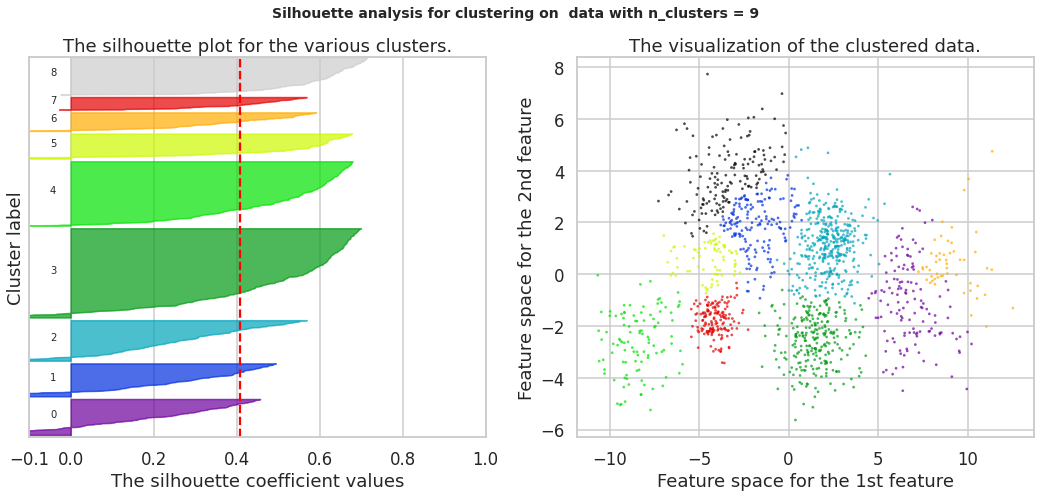

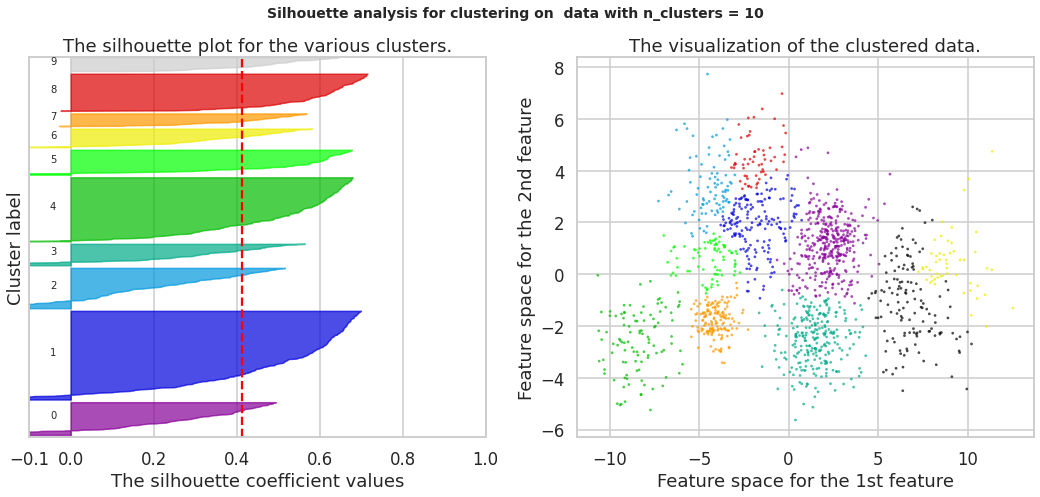

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Multi_blob_Data) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(Multi_blob_Data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Multi_blob_Data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Multi_blob_Data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Another Way

In [63]:
# Scaling the data so that all the features become comparable
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Multi_blob_Data)
 
# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
 
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [64]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

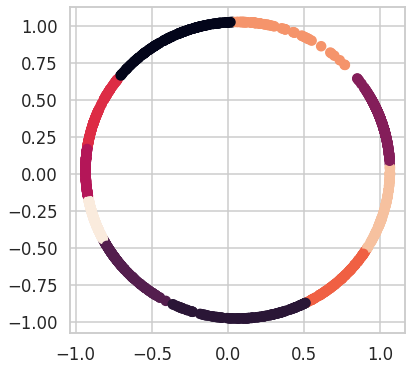

In [69]:
ac2 = AgglomerativeClustering(n_clusters = 5)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal))
plt.show()

[0.5482291916792322]


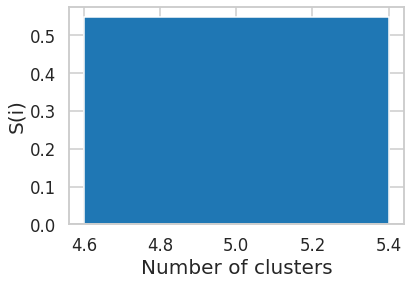

In [71]:

k = 5
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
# silhouette_scores.append(
#         silhouette_score(X_principal, ac3.fit_predict(X_principal)))
# silhouette_scores.append(
#         silhouette_score(X_principal, ac4.fit_predict(X_principal)))
# silhouette_scores.append(
#         silhouette_score(X_principal, ac5.fit_predict(X_principal)))
# silhouette_scores.append(
#         silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
print(silhouette_scores)
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

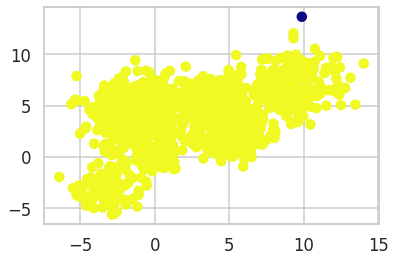

Estimated no. of clusters: 2
Estimated no. of noise points: 1


In [72]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 25).fit(Multi_blob_Data) # fitting the model
labels = dbscan.labels_ # getting the labels
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [73]:
from numpy import unique
model = DBSCAN(eps=3, min_samples= 25)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(Multi_blob_Data)
# retrieve unique clusters
clusters = unique(yhat)
score_dbsacn_s = silhouette_score(Multi_blob_Data, yhat, metric='euclidean')
print('Silhouette Score: %.4f' % score_dbsacn_s)

Silhouette Score: 0.4685


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


# Kmeans

In [103]:
from sklearn.datasets import load_iris
from sklearn import datasets
iris_data = datasets.load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
df=pd.DataFrame(iris_data.data)


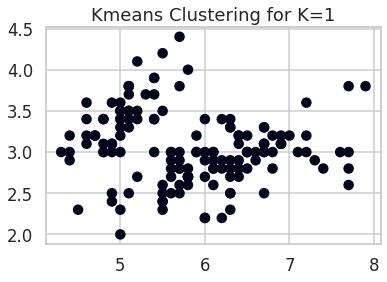

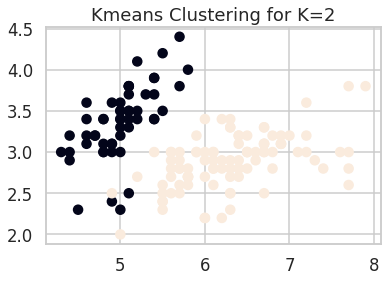

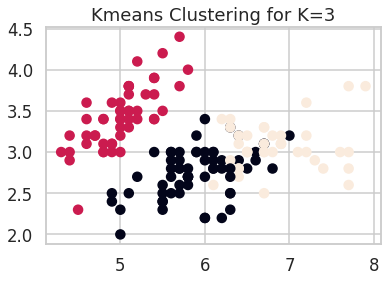

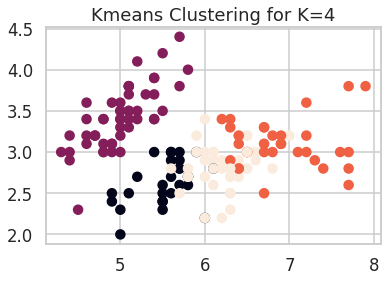

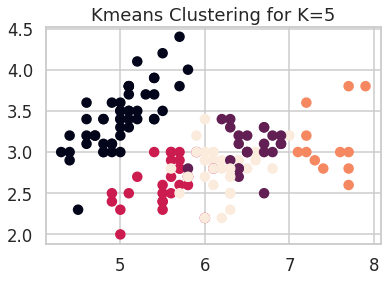

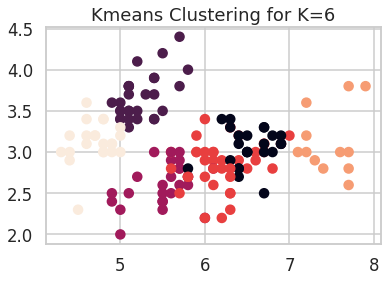

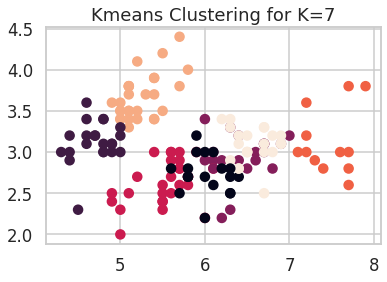

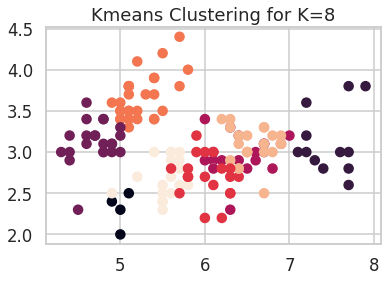

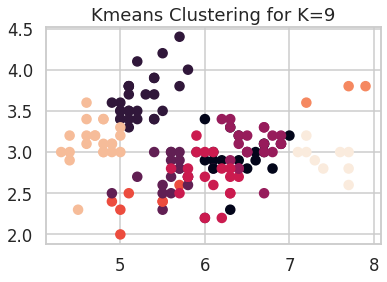

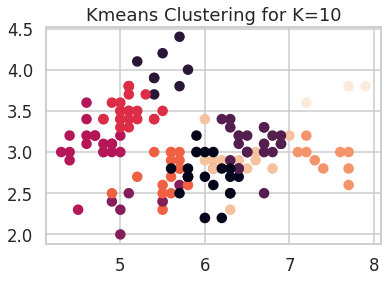

In [104]:

cs = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
    plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kmeans.labels_)
    plt.title("Kmeans Clustering for K="+str(k))
    plt.show()

Elbow Method

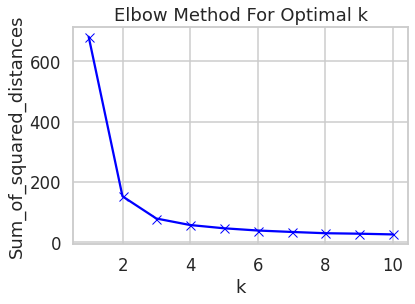

3

In [91]:
inertia = []
K = range(1,11)
distortions=[]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(scipy.spatial.distance.cdist(df,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    df.shape[0])
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

Silhouette Score

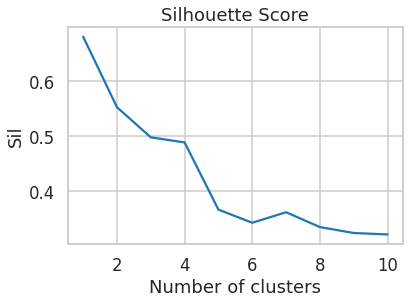

In [93]:
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))
plt.plot(range(1, 11), sil)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

# Hierarchal Clustering

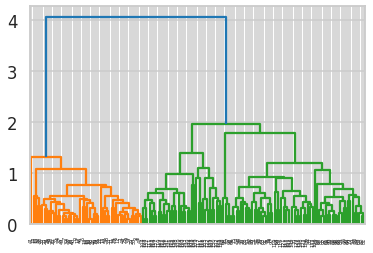

In [98]:
clusters = shc.linkage(df, method='average', 
            metric="euclidean")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

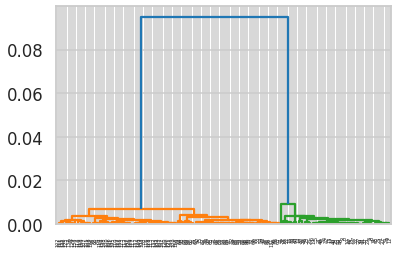

In [96]:
clusters = shc.linkage(df,"average", metric="cosine")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

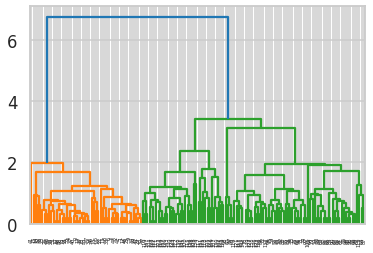

In [97]:
clusters = shc.linkage(df,"average", metric="cityblock")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

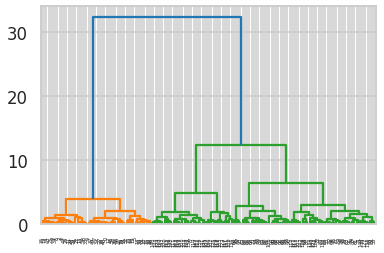

In [99]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
trained_model = clustering_model.fit(df)


# A method for generating dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# plot dendrogram to visualize clusters
plot_dendrogram(trained_model)

[4.22824171 0.24267075]


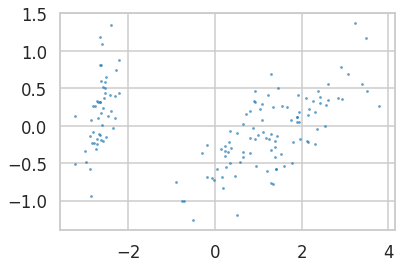

In [108]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(df)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(df)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

For n_clusters = 2 The average silhouette_score is : 0.6867350732769777
For n_clusters = 3 The average silhouette_score is : 0.5543236611296419
For n_clusters = 4 The average silhouette_score is : 0.4889670857554692
For n_clusters = 5 The average silhouette_score is : 0.48438258927905953
For n_clusters = 6 The average silhouette_score is : 0.3592376192603081
For n_clusters = 7 The average silhouette_score is : 0.34220719366205
For n_clusters = 8 The average silhouette_score is : 0.3435906599119536
For n_clusters = 9 The average silhouette_score is : 0.3304886352874657
For n_clusters = 10 The average silhouette_score is : 0.29253860430301265


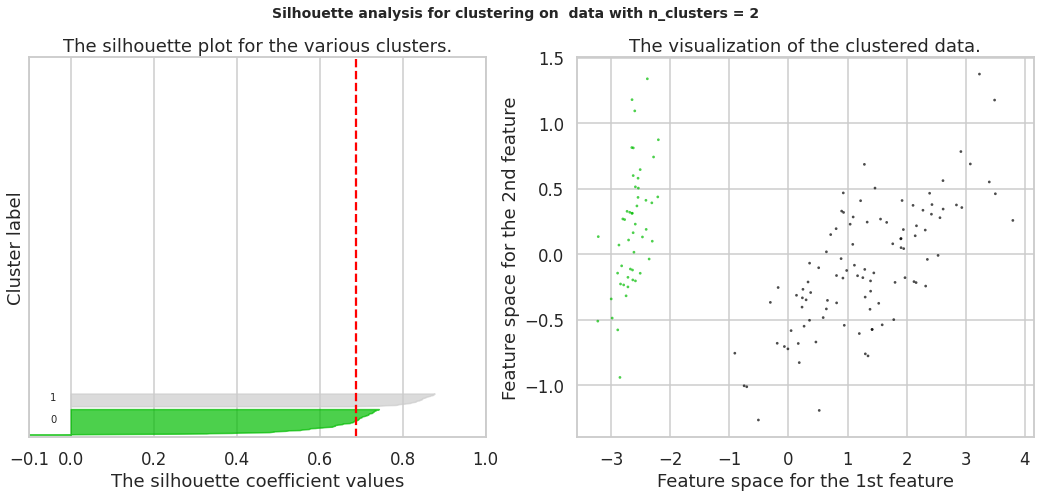

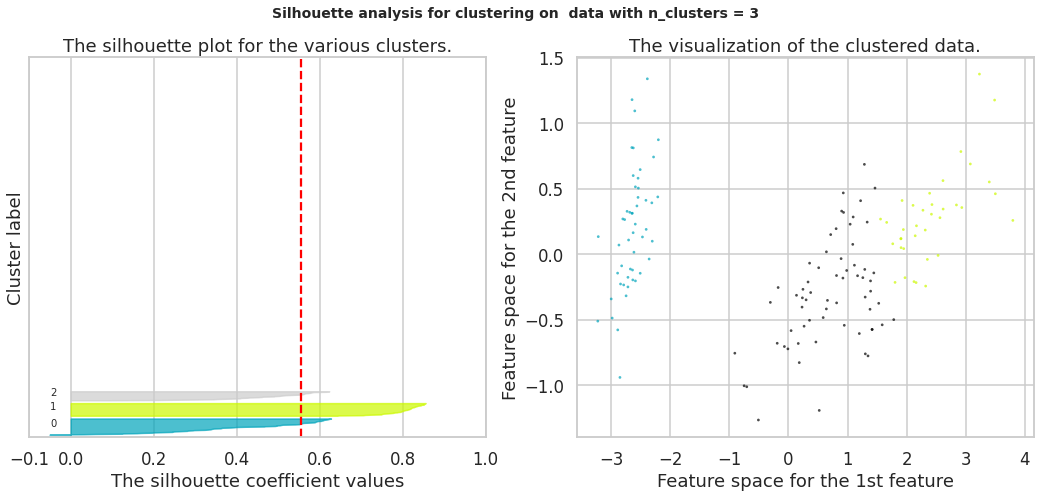

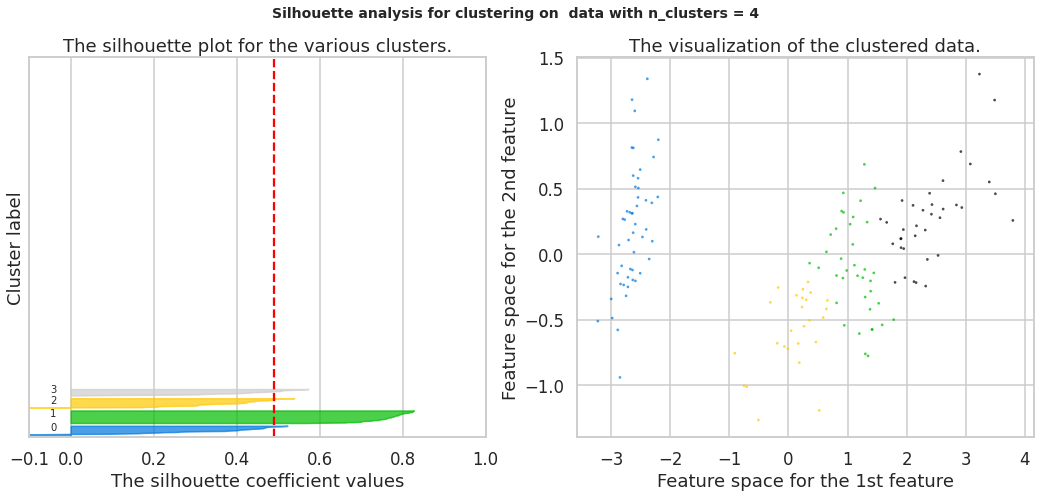

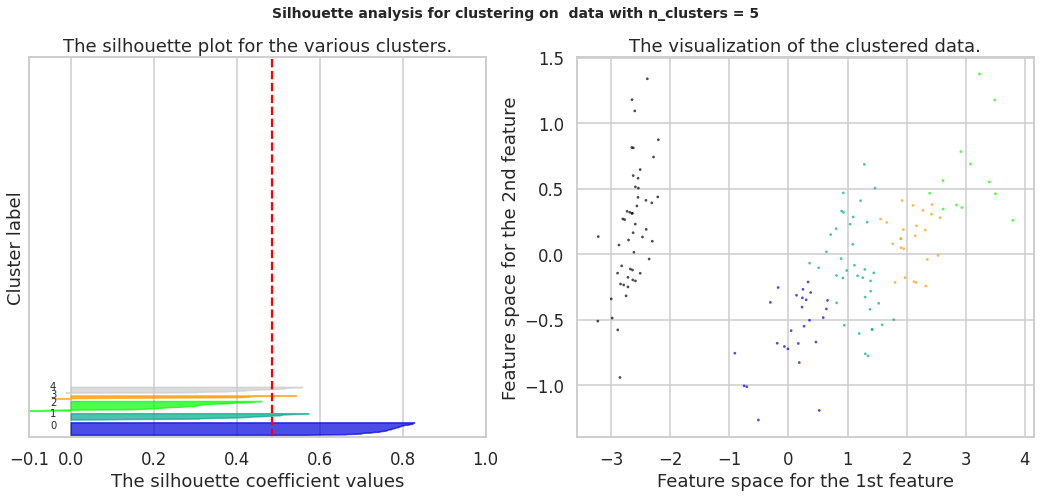

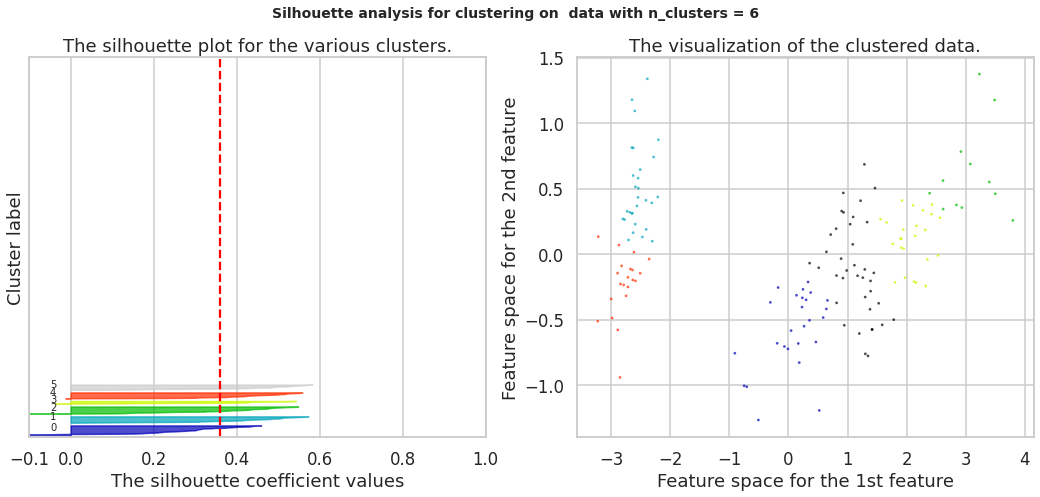

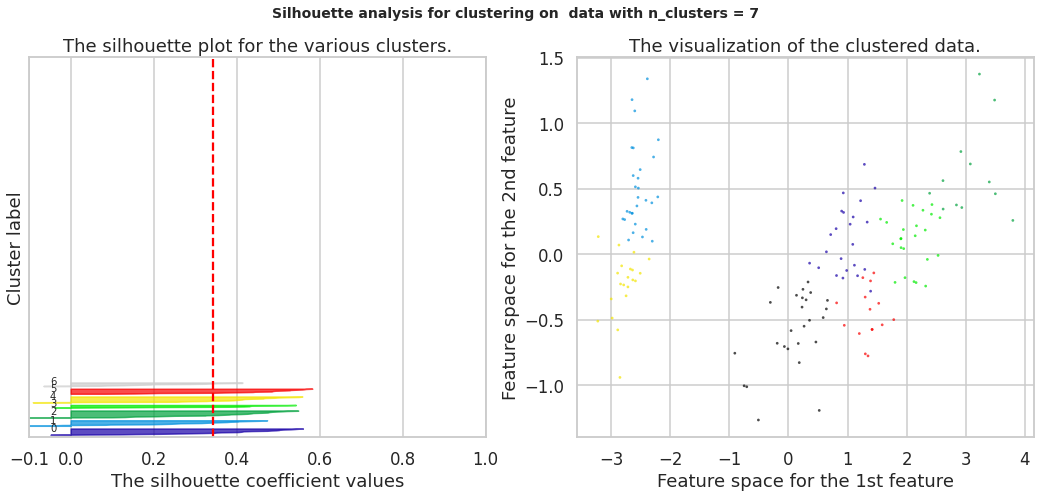

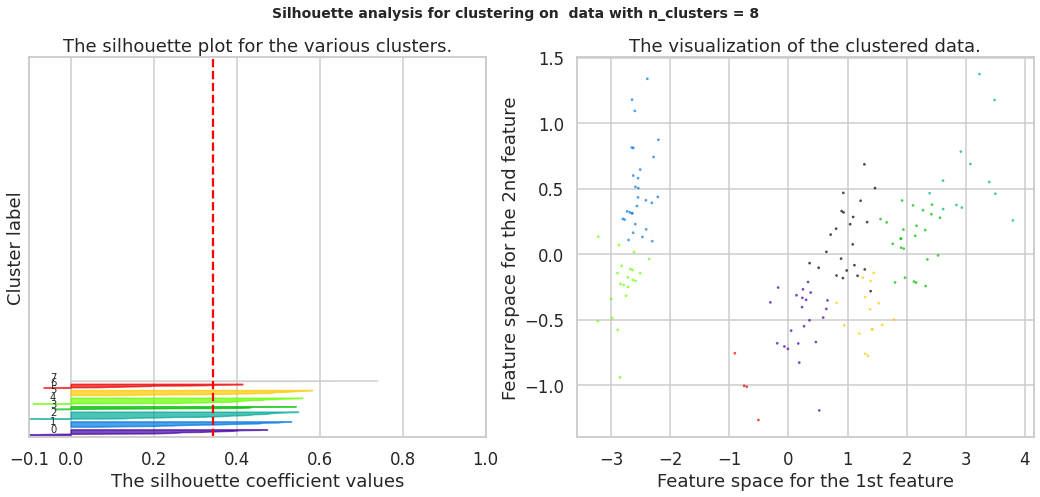

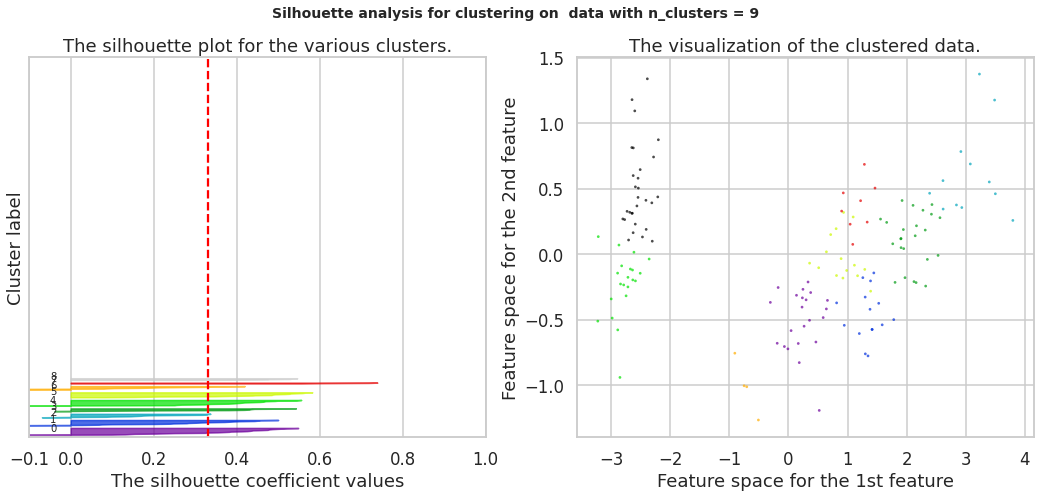

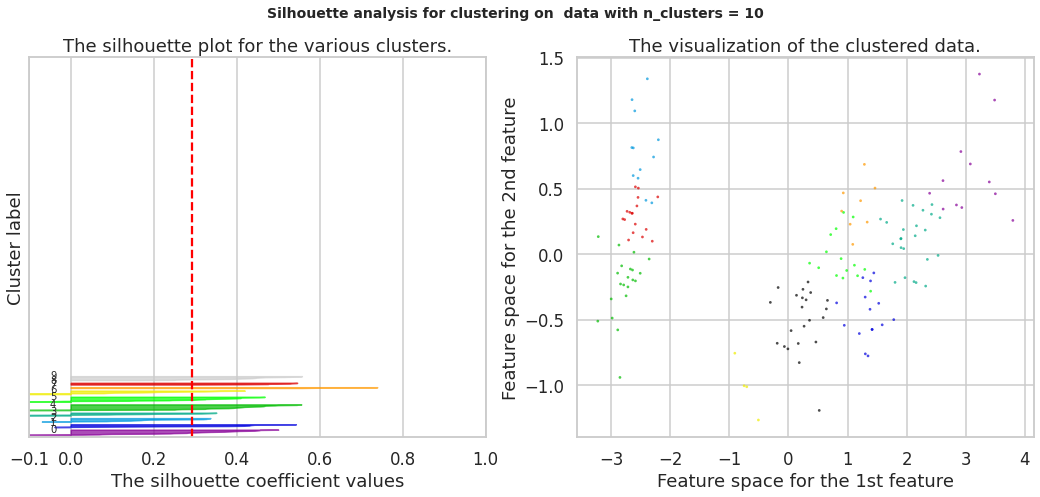

In [109]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Multi_blob_Data) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# DBScan

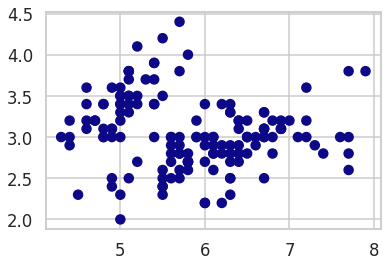

Estimated no. of clusters: 1
Estimated no. of noise points: 0


In [111]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 25).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels
plt.scatter(df.iloc[:, 0], df.iloc[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [ ]:
from numpy import unique
model = DBSCAN(eps=3, min_samples= 25)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(df)
# retrieve unique clusters
clusters = unique(yhat)
score_dbsacn_s = silhouette_score(df, yhat, metric='euclidean')
print('Silhouette Score: %.4f' % score_dbsacn_s)

## Customer dataset
Repeat all the above on the customer data set 

# Kmeans

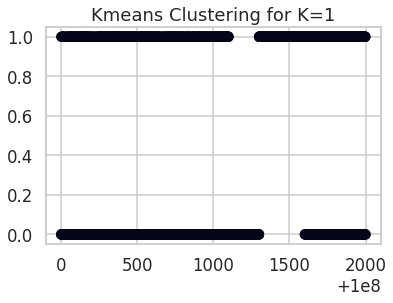

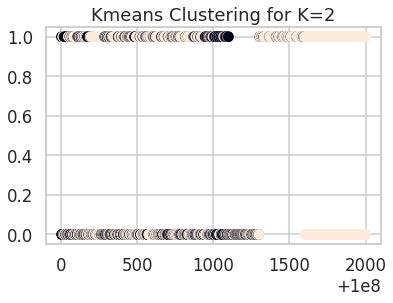

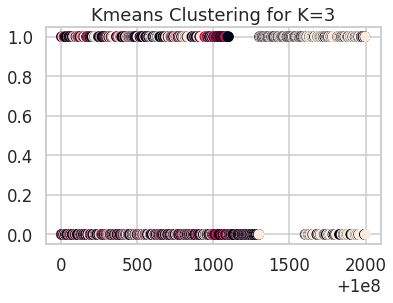

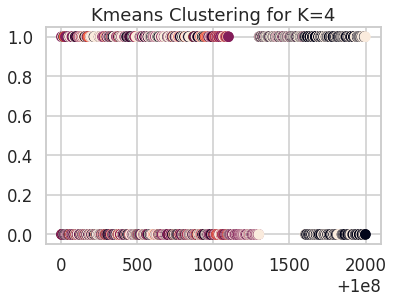

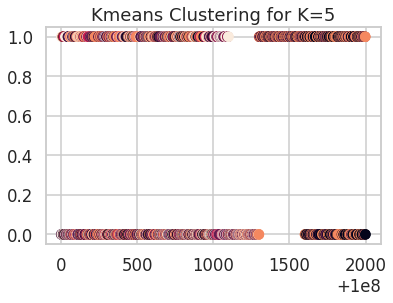

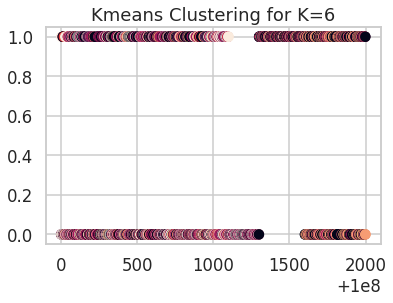

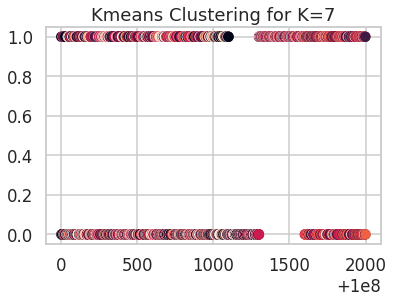

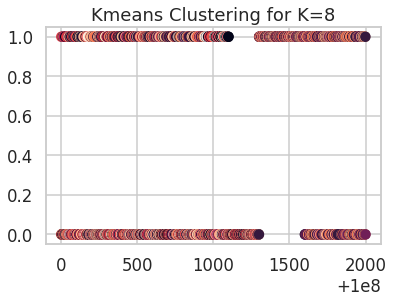

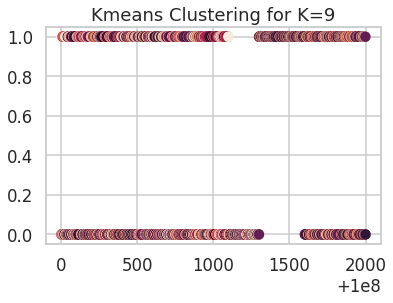

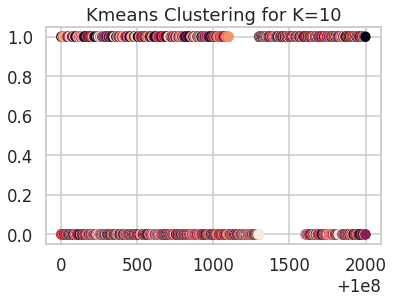

In [114]:
dfc = pd.read_csv('/content/Customer data.csv')
cs = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
    kmeans.fit(dfc)
    cs.append(kmeans.inertia_)
    plt.scatter(dfc.iloc[:,0], dfc.iloc[:,1], c=kmeans.labels_)
    plt.title("Kmeans Clustering for K="+str(k))
    plt.show()

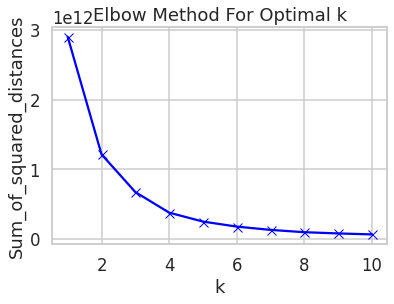

3

In [115]:
inertia = []
K = range(1,11)
distortions=[]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfc)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(scipy.spatial.distance.cdist(dfc,
    km.cluster_centers_, 'euclidean'),axis=1)) /
    df.shape[0])
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
kl.elbow

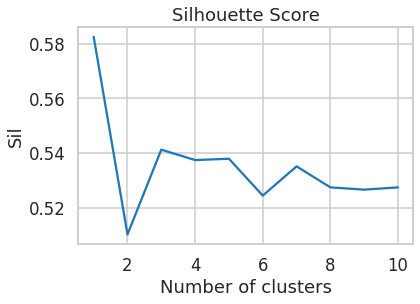

In [117]:

sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(dfc)
  labels = kmeans.labels_
  sil.append(silhouette_score(dfc, labels, metric = 'euclidean'))
plt.plot(range(1, 11), sil)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

# Hierarchal Clustering

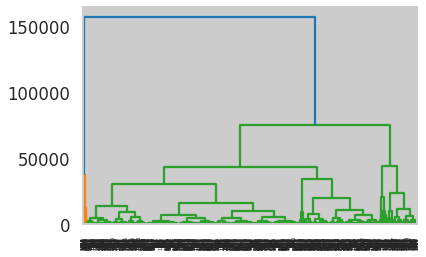

In [124]:
clusters = shc.linkage(dfc, method='average', 
            metric="euclidean")
shc.dendrogram(clusters)
# plt.axhline(y = 125, color = 'r', linestyle = '-')
plt.show()

[1.45231320e+09 3.02831617e+05]


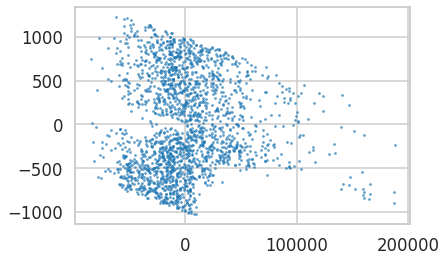

In [122]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(dfc)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(dfc)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

For n_clusters = 2 The average silhouette_score is : 0.5102602085521872
For n_clusters = 3 The average silhouette_score is : 0.530766080434483
For n_clusters = 4 The average silhouette_score is : 0.4636030456994657
For n_clusters = 5 The average silhouette_score is : 0.49039452277486484
For n_clusters = 6 The average silhouette_score is : 0.5018810168839883
For n_clusters = 7 The average silhouette_score is : 0.5058133013218717
For n_clusters = 8 The average silhouette_score is : 0.5061034267544667
For n_clusters = 9 The average silhouette_score is : 0.4907311840380878
For n_clusters = 10 The average silhouette_score is : 0.48758720031702557


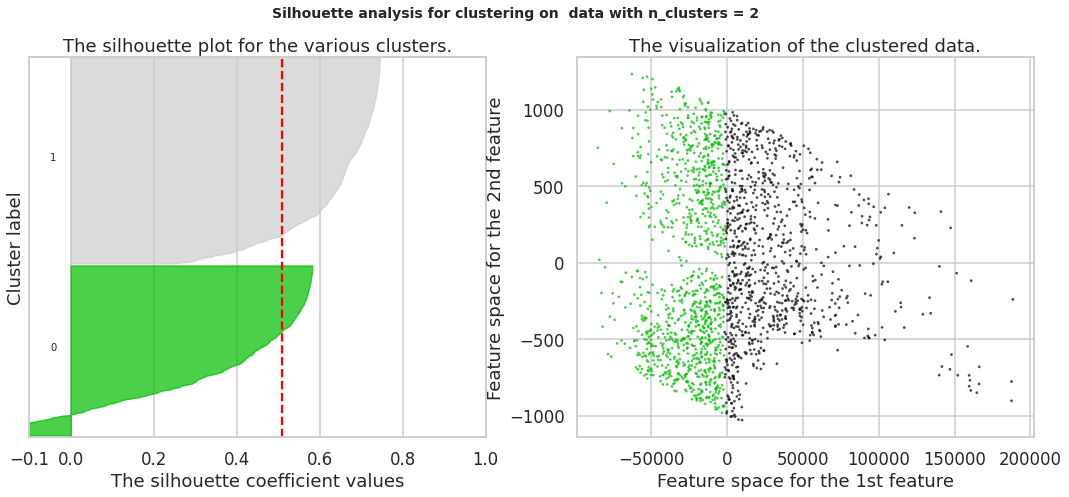

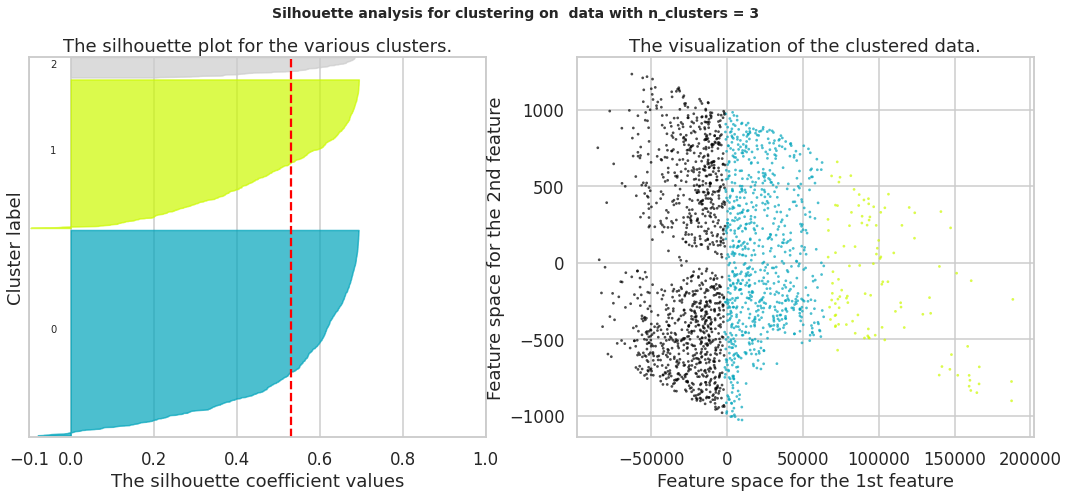

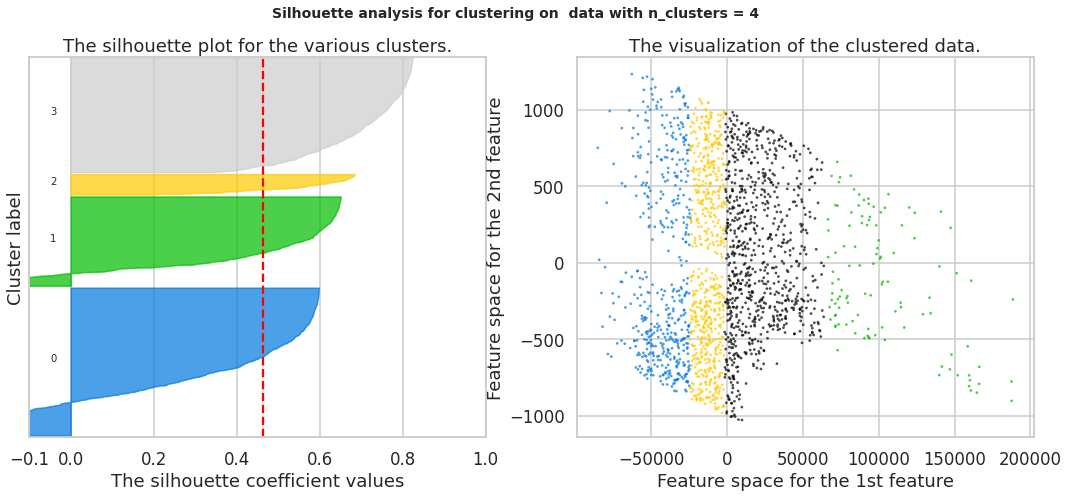

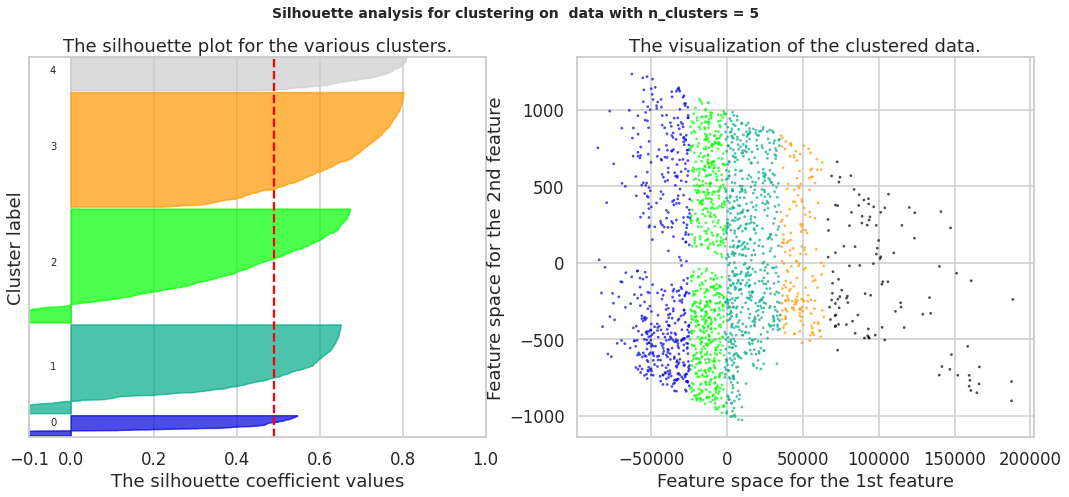

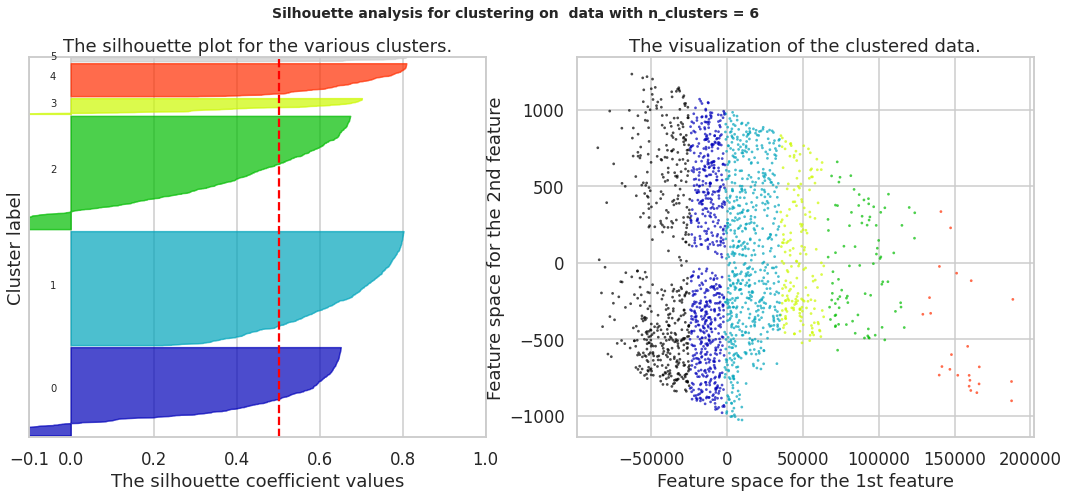

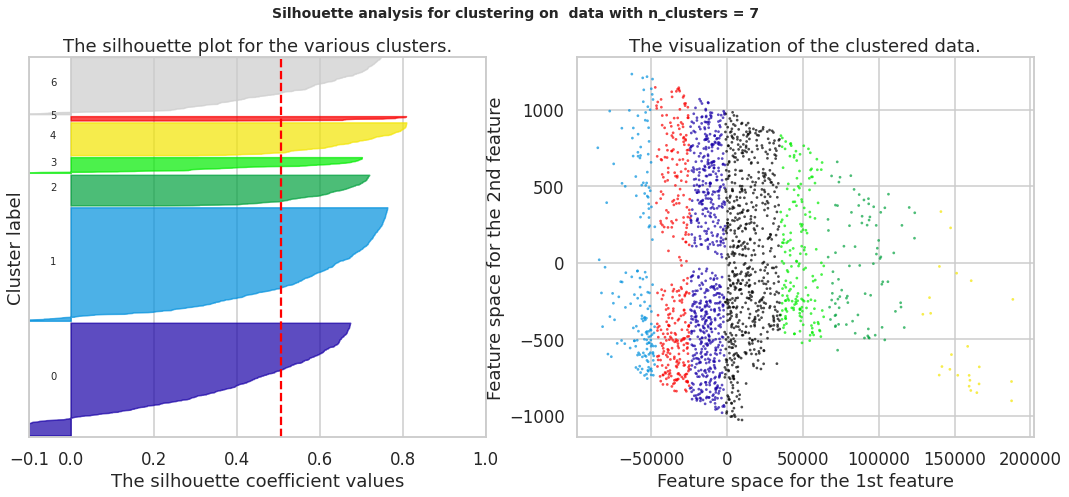

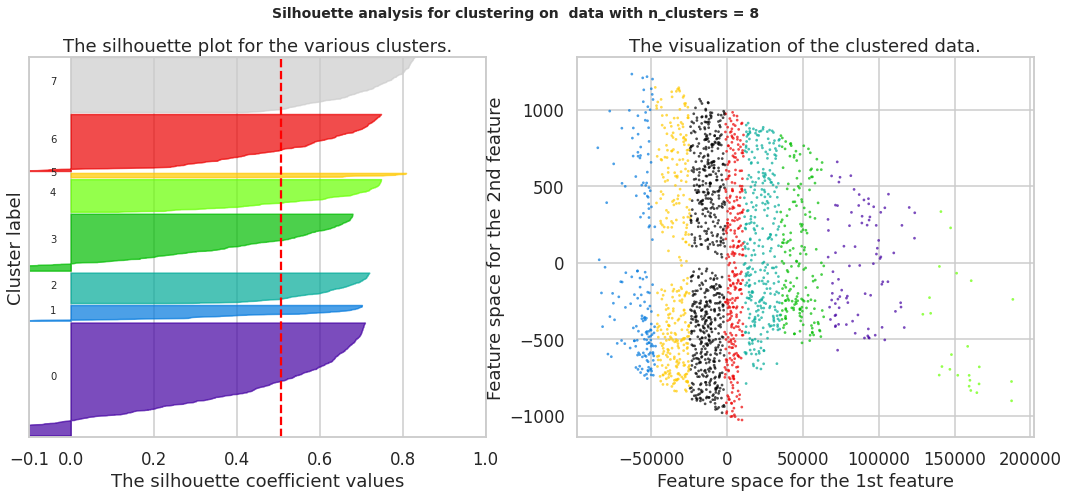

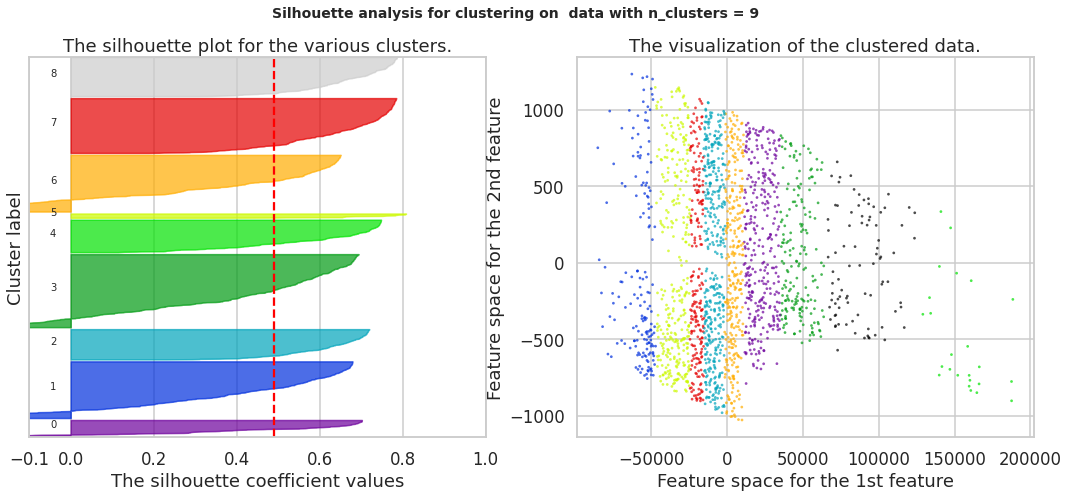

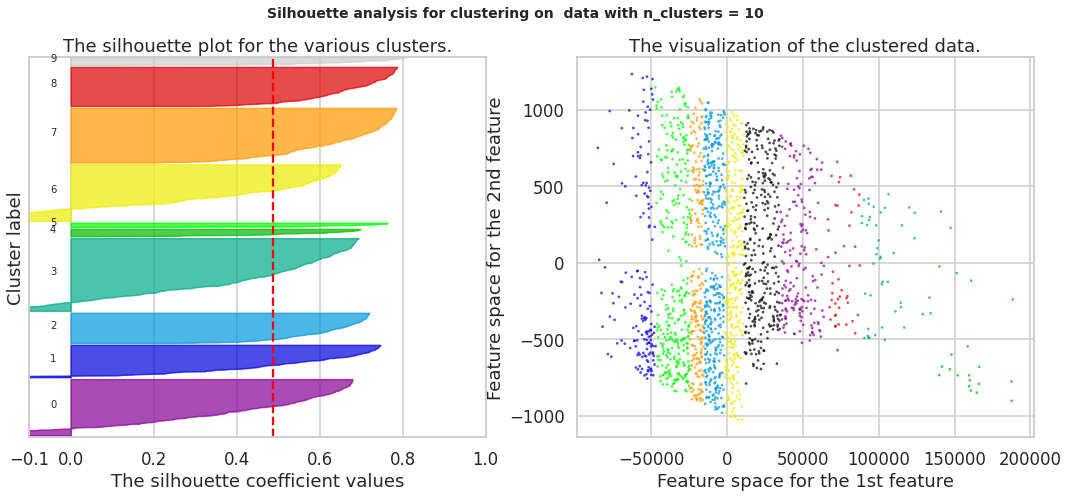

In [123]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dfc) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(dfc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dfc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


# DBScan

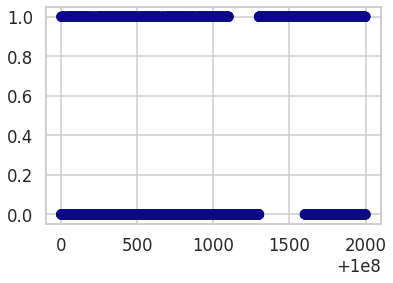

Estimated no. of clusters: 1
Estimated no. of noise points: 2000


In [118]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 25).fit(dfc) # fitting the model
labels = dbscan.labels_ # getting the labels
plt.scatter(dfc.iloc[:, 0], dfc.iloc[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.show() # showing the plot
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [ ]:
from numpy import unique
model = DBSCAN(eps=3, min_samples= 25)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(df)
# retrieve unique clusters
clusters = unique(yhat)
score_dbsacn_s = silhouette_score(df, yhat, metric='euclidean')
print('Silhouette Score: %.4f' % score_dbsacn_s)